# 연습문제 2-1

## 다음은 서울시 아파트단지별 관리비 정보이다. 표상에 나타난 결측 속성 값(총공용관리비용, 총세대사용비용, 총장기구선충당금)을 채우시오.

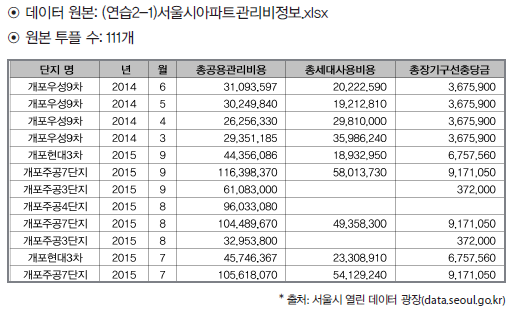

### 적용해야 할 결측값 처리 기법
### 1. 속성의 평균값으로 대체
### 2. 속성의 그룹별 평균값으로 대체 (그룹 기준 : 년, 월)
### 3. 회귀분석에 의해서 총장기구선충당금 결측값 대체 (총공용관리비용과 총장기구선충당금과의 회귀분석 이용)

### 주의) 원본 엑셀파일을 csv로 변환시킨 다음 read_csv() 이용할 것 (AWS 환경에서의 엑셀버전 문제 때문)

In [11]:
# ex2-1(연습).ipynb

import pandas as pd  # 데이터프레임 활용을 위한 pandas 패키지 임포트

# 데이터로드 (데이터 원본 파일 : (연습2-1)서울시아파트관리비정보.csv)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('연습문제파일/(연습2-1)서울시아파트관리비정보.csv', encoding='CP949', engine='python')

In [12]:
rawData

,단지 명,년,월,총공용관리비용,총세대사용비용,총장기구선충당금
0,개포우성9차,2015,9,35235859,15180570.0,3675900.0
1,개포우성9차,2015,8,33567468,22878080.0,3675900.0
2,개포우성9차,2015,7,37106898,13559350.0,3675900.0
3,개포우성9차,2015,6,38907818,16921900.0,3675900.0
4,개포우성9차,2015,5,33410514,18092000.0,3675900.0
...,...,...,...,...,...,...
106,개포주공4단지,2013,7,84542470,NaN,NaN
107,개포주공7단지,2013,7,86720610,68673700.0,7860900.0
108,개포주공3단지,2013,6,40647080,NaN,372000.0
109,개포주공7단지,2013,5,87324610,136636070.0,7860900.0


In [13]:
# 결측값(NULL값)을 해당 속성의 평균값으로 대체
rawData_missing_fill_mean = rawData.fillna(rawData.mean())

In [14]:
rawData_missing_fill_mean

,단지 명,년,월,총공용관리비용,총세대사용비용,총장기구선충당금
0,개포우성9차,2015,9,35235859,1.518057e+07,3.675900e+06
1,개포우성9차,2015,8,33567468,2.287808e+07,3.675900e+06
2,개포우성9차,2015,7,37106898,1.355935e+07,3.675900e+06
3,개포우성9차,2015,6,38907818,1.692190e+07,3.675900e+06
4,개포우성9차,2015,5,33410514,1.809200e+07,3.675900e+06
...,...,...,...,...,...,...
106,개포주공4단지,2013,7,84542470,5.589450e+07,4.967733e+06
107,개포주공7단지,2013,7,86720610,6.867370e+07,7.860900e+06
108,개포주공3단지,2013,6,40647080,5.589450e+07,3.720000e+05
109,개포주공7단지,2013,5,87324610,1.366361e+08,7.860900e+06


In [15]:
# 결측값을 같은 클래스(분류)의 속성 평균값으로 대체
# 클래스(분류) 기준 속성 : 적합
rawData_missing_fill_mean_groupby = rawData.fillna(rawData.groupby(['년','월'])
                                                 .transform('mean'))

In [16]:
rawData_missing_fill_mean_groupby

,단지 명,년,월,총공용관리비용,총세대사용비용,총장기구선충당금
0,개포우성9차,2015,9,35235859,15180570.0,3675900.0
1,개포우성9차,2015,8,33567468,22878080.0,3675900.0
2,개포우성9차,2015,7,37106898,13559350.0,3675900.0
3,개포우성9차,2015,6,38907818,16921900.0,3675900.0
4,개포우성9차,2015,5,33410514,18092000.0,3675900.0
...,...,...,...,...,...,...
106,개포주공4단지,2013,7,84542470,68673700.0,7860900.0
107,개포주공7단지,2013,7,86720610,68673700.0,7860900.0
108,개포주공3단지,2013,6,40647080,NaN,372000.0
109,개포주공7단지,2013,5,87324610,136636070.0,7860900.0


In [17]:
# 회귀분석을 활용한 총장기구선충당금 결측치 예측 (총공용관리비용과 총장기구선충당금 간 회귀분석 활용)
from scipy import stats  # 선형회귀분석을 위한 scipy 패키지 중 stats 모듈 임포트
import numpy as np  # 수학 및 과학 연산을 위한 패키지

# 회귀분석을 활용한 결측치 예측 (총공용관리비용과 총장기구선충당금 간 회귀분석)
# stats.linregress(x, y) : y = slope * x + intercept 형식의 선형함수를 찾아주는 stats 모듈 함수로 다섯 개의 값을 반환
# 데이터프레임 복사 : rawData -> rawData_missing_fill_regression
rawData_missing_fill_regression = pd.DataFrame(rawData, copy=True)

In [18]:
# mask : 총세대사용비용 속성값과 총장기구선충당금 속성값 둘 다 NaN(NULL)이 아닐 때 True로 세팅하기 위한 변수
mask = ~np.isnan(rawData_missing_fill_regression['총공용관리비용']) & ~np.isnan(rawData_missing_fill_regression['총장기구선충당금'])

In [19]:
mask

0       True
1       True
2       True
3       True
4       True
       ...  
106    False
107     True
108     True
109     True
110    False
Length: 111, dtype: bool

In [20]:
# NaN(NULL)값을 제외하고 선형회귀분석 수행
slope, intercept, r_value, p_value, std_err = stats.linregress(rawData_missing_fill_regression['총공용관리비용'][mask], 
                                                               rawData_missing_fill_regression['총장기구선충당금'][mask])

In [21]:
# 총장기구선충당금 속성값이 NaN(NULL)인 행의 인덱스번호 찾기
idx = rawData_missing_fill_regression['총장기구선충당금'].index[pd.isna(rawData_missing_fill_regression['총장기구선충당금'])]

In [22]:
# 총장기구선충당금 속성값이 NaN(NULL)인 행 출력
rawData_missing_fill_regression.loc[idx, :]

,단지 명,년,월,총공용관리비용,총세대사용비용,총장기구선충당금
22,개포주공4단지,2015,8,96033080,NaN,NaN
27,개포주공4단지,2015,7,75779650,NaN,NaN
36,개포주공4단지,2015,4,78793230,NaN,NaN
45,개포주공4단지,2015,2,94560150,NaN,NaN
55,개포주공4단지,2014,11,71194180,NaN,NaN
56,개포주공3단지,2014,10,34270440,NaN,NaN
57,개포주공4단지,2014,10,75790230,NaN,NaN
62,개포주공4단지,2014,8,75792660,NaN,NaN
67,개포주공4단지,2014,7,87735410,NaN,NaN
78,개포주공4단지,2014,4,77415760,NaN,NaN


In [23]:
# 총장기구선충당금 속성값이 NaN(NULL)인 행에 대해 총공용관리비용에 의한 총장기구선충당금값 채우기
rawData_missing_fill_regression['총장기구선충당금'].fillna(rawData_missing_fill_regression['총공용관리비용'] * slope + intercept, inplace=True)

In [24]:
# 총장기구선충당금 속성값이 NaN(NULL)인 행에 대해서 총장기구선충당금 결측값을 채운 결과 출력
rawData_missing_fill_regression.loc[idx, :]

,단지 명,년,월,총공용관리비용,총세대사용비용,총장기구선충당금
22,개포주공4단지,2015,8,96033080,NaN,6.970165e+06
27,개포주공4단지,2015,7,75779650,NaN,5.890655e+06
36,개포주공4단지,2015,4,78793230,NaN,6.051279e+06
45,개포주공4단지,2015,2,94560150,NaN,6.891658e+06
55,개포주공4단지,2014,11,71194180,NaN,5.646249e+06
56,개포주공3단지,2014,10,34270440,NaN,3.678209e+06
57,개포주공4단지,2014,10,75790230,NaN,5.891219e+06
62,개포주공4단지,2014,8,75792660,NaN,5.891348e+06
67,개포주공4단지,2014,7,87735410,NaN,6.527898e+06
78,개포주공4단지,2014,4,77415760,NaN,5.977860e+06
